In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy.interpolate import interp1d

df = pd.read_csv('owid-co2-data.csv')

df_philippines = df[df['country'] == 'Philippines']

selected_columns = ['country', 'year', 'cement_co2', 'coal_co2', 'flaring_co2', 
    'gas_co2', 'oil_co2', 'consumption_co2', 
    'total_ghg_excluding_lucf']

df_selected = df_philippines[selected_columns]

df_filtered = df_selected[(df_selected['year'] >= 1907) & (df_selected['year'] <= 2022)]

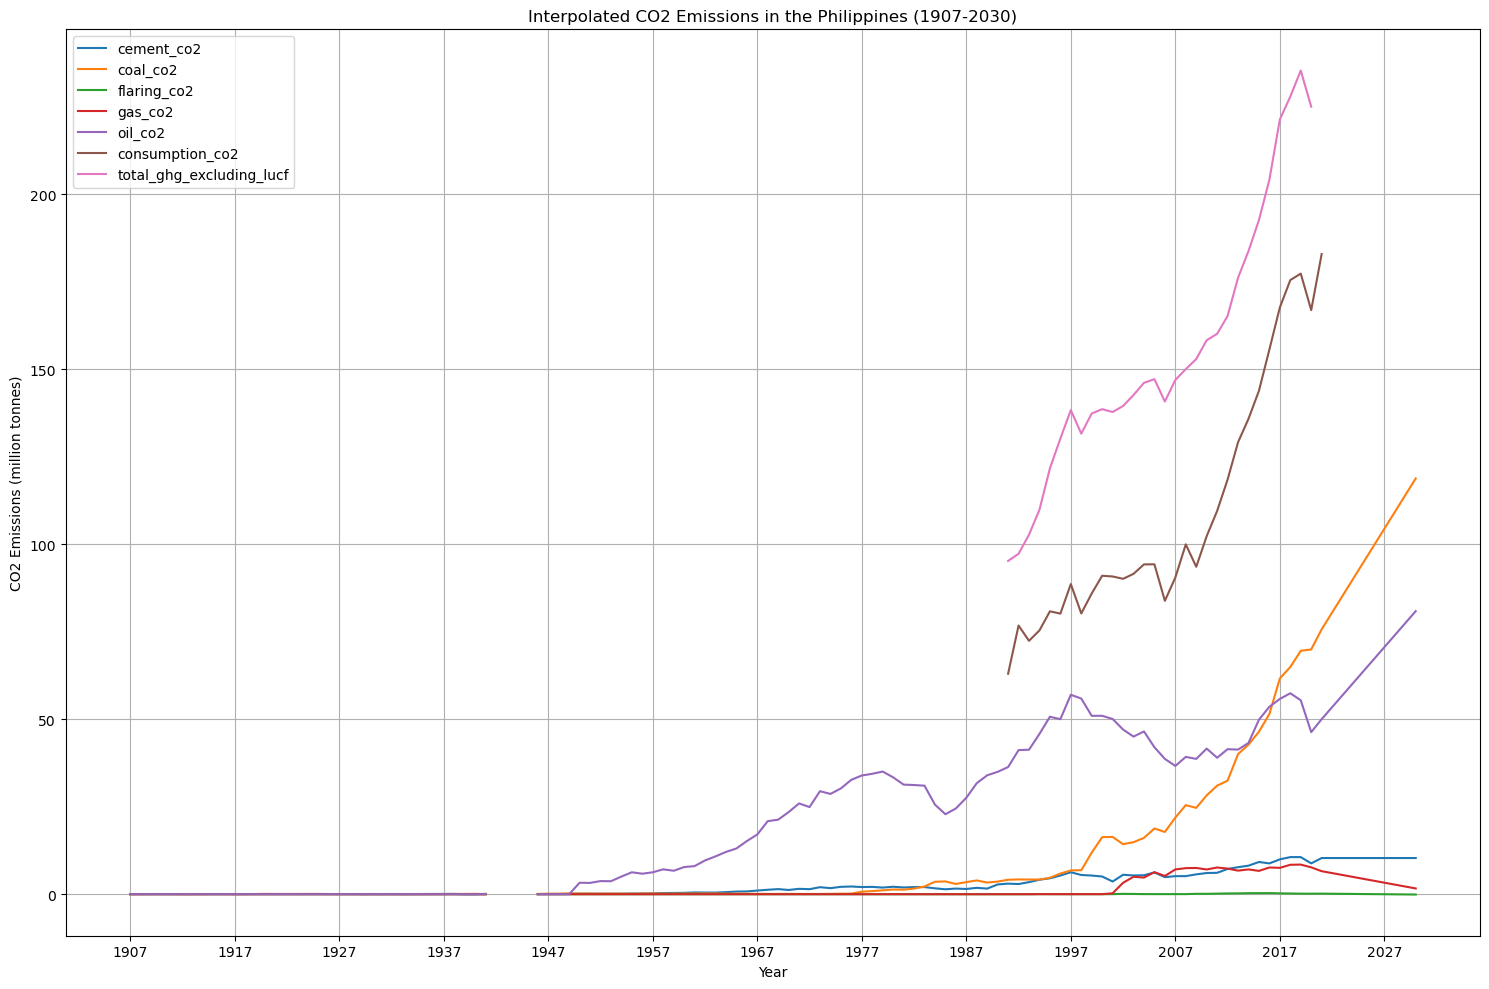

In [56]:
# Assuming df_filtered is already defined as per your previous steps

# List of columns for interpolation
columns_to_interpolate = [
    'cement_co2', 'coal_co2', 'flaring_co2', 
    'gas_co2', 'oil_co2',
    'consumption_co2', 'total_ghg_excluding_lucf'
]

# Extend the range of years to include 2030
extended_years = list(range(1907, 2031))

# Dictionary to store interpolated data
interpolated_data = {}

# Perform polynomial interpolation for each column
for column in columns_to_interpolate:
    # Create a copy of the column to avoid SettingWithCopyWarning
    df_temp = df_filtered[column].copy()
    
    # Replace NaN values with None for interpolation
    df_temp[df_temp.isna()] = None
    
    # Perform interpolation
    f = interp1d(df_filtered['year'], df_temp, kind='linear', fill_value='extrapolate')
    
    # Interpolate for the entire range of years (1907 to 2030)
    interpolated_data[column] = f(extended_years)

# Convert interpolated_data dictionary to a new DataFrame
df_interpolated = pd.DataFrame(interpolated_data)

# Add 'country' and 'year' columns to the interpolated DataFrame
df_interpolated['country'] = df_filtered['country'].values[0]  # Assuming country remains constant
df_interpolated['year'] = extended_years

# Plotting
plt.figure(figsize=(15, 10))

for column in columns_to_interpolate:
    plt.plot(df_interpolated['year'], df_interpolated[column], label=column)

# Set x-axis ticks to include 2030
plt.xticks(list(range(1907, 2031, 10)))

# Set plot title and labels
plt.title('Interpolated CO2 Emissions in the Philippines (1907-2030)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (million tonnes)')
plt.legend(loc='upper left')

# Show grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


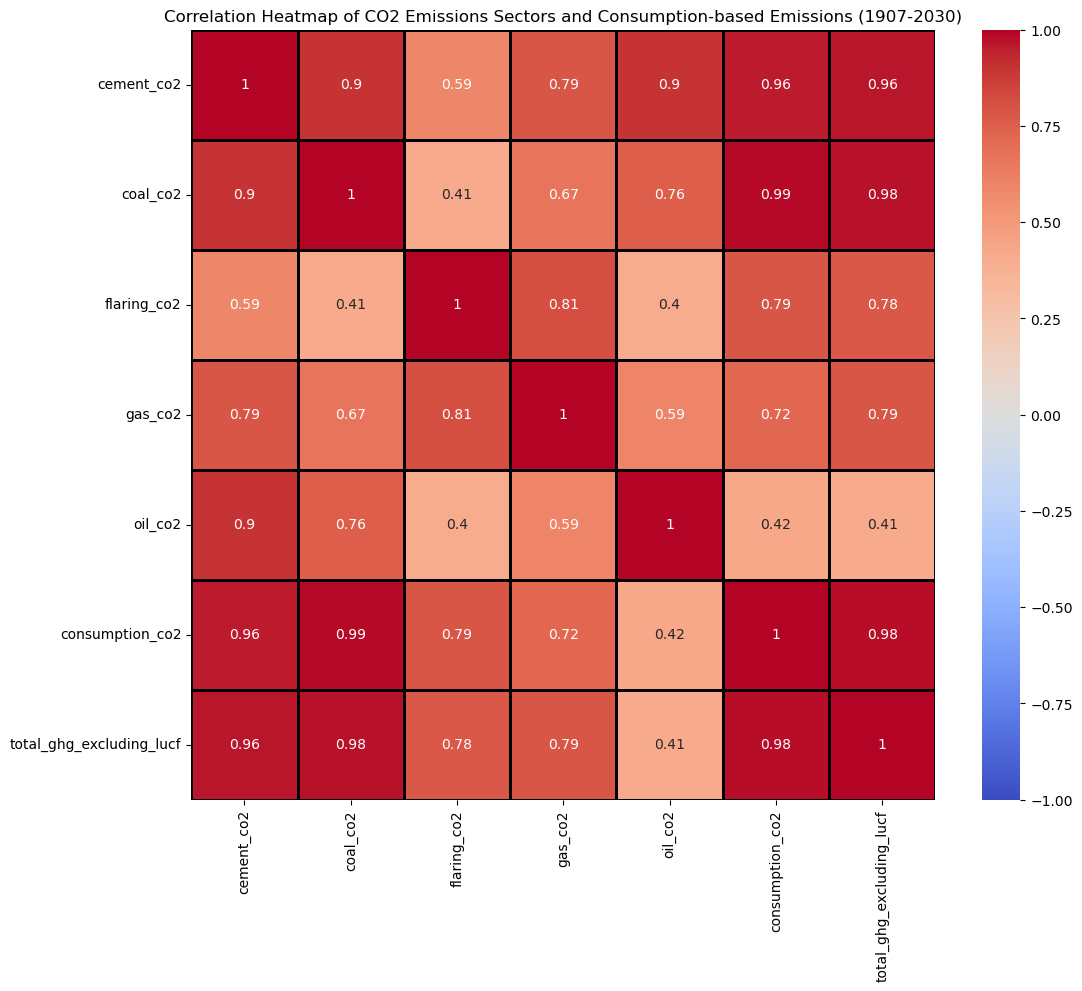

In [57]:
import seaborn as sns

# Extracting the relevant columns for the heatmap
heatmap_data = df_interpolated[columns_to_interpolate]

# Calculating the correlation matrix
correlation_matrix = heatmap_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=1, linecolor='black')

# Setting the plot title
plt.title('Correlation Heatmap of CO2 Emissions Sectors and Consumption-based Emissions (1907-2030)')

# Showing the plot
plt.show()

In [59]:
# Dictionary to store integrated emissions for each sector
integrated_emissions = {}

# Fill NaN values with zeros
df_interpolated.fillna(0, inplace=True)

# Calculate integration using 3/8 Simpson's Rule for each sector
for column in columns_to_interpolate:
    # Get the interpolated data values
    y_values = df_interpolated[column].values
    
    # Calculate the width of each subinterval
    delta_x = (extended_years[-1] - extended_years[0]) / (len(extended_years) - 1)
    
    # Initialize the integral sum
    integral_sum = 0
    
    # Apply 3/8 Simpson's Rule formula
    for i in range(0, len(y_values) - 3, 3):
        integral_sum += (3 * delta_x / 8) * (y_values[i] + 3*y_values[i+1] + 3*y_values[i+2] + y_values[i+3])
    
    # Store the integrated emissions for the sector
    integrated_emissions[column] = integral_sum

# Print the integrated emissions for each sector
for sector, emission in integrated_emissions.items():
    print(f"Total CO2 emissions for {sector}: {emission} million tonnes")

Total CO2 emissions for cement_co2: 332.79525 million tonnes
Total CO2 emissions for coal_co2: 1731.1319999999996 million tonnes
Total CO2 emissions for flaring_co2: 3.3982500000000004 million tonnes
Total CO2 emissions for gas_co2: 169.69424999999998 million tonnes
Total CO2 emissions for oil_co2: 2814.532875 million tonnes
Total CO2 emissions for consumption_co2: 3358.069125 million tonnes
Total CO2 emissions for total_ghg_excluding_lucf: 4673.65125 million tonnes


In [60]:
# Dictionary to store integrated emissions for each sector
integrated_emissions = {}

# Fill NaN values with zeros
df_interpolated.fillna(0, inplace=True)

# Extract relevant data for the range where 'consumption_co2' and 'total_ghg_excluding_lucf' are present
mask = (df_interpolated['year'] >= df_filtered['year'].min()) & (df_interpolated['year'] <= df_filtered['year'].max())
years_range = df_interpolated['year'][mask].values
data_range = df_interpolated.loc[mask, columns_to_interpolate].values

# Calculate integration using 3/8 Simpson's Rule for each sector within the specified range
for i, column in enumerate(columns_to_interpolate):
    # Get the interpolated data values for the specified range
    y_values = data_range[:, i]
    
    # Calculate the width of each subinterval
    delta_x = (years_range[-1] - years_range[0]) / (len(years_range) - 1)
    
    # Initialize the integral sum
    integral_sum = 0
    
    # Apply 3/8 Simpson's Rule formula
    for j in range(0, len(y_values) - 3, 3):
        integral_sum += (3 * delta_x / 8) * (y_values[j] + 3*y_values[j+1] + 3*y_values[j+2] + y_values[j+3])
    
    # Store the integrated emissions for the sector
    integrated_emissions[column] = integral_sum

# Print the integrated emissions for each sector within the specified range
for sector, emission in integrated_emissions.items():
    print(f"Total CO2 emissions for {sector}: {emission:.2f} million tonnes")


Total CO2 emissions for cement_co2: 239.78 million tonnes
Total CO2 emissions for coal_co2: 856.14 million tonnes
Total CO2 emissions for flaring_co2: 3.07 million tonnes
Total CO2 emissions for gas_co2: 132.68 million tonnes
Total CO2 emissions for oil_co2: 2225.64 million tonnes
Total CO2 emissions for consumption_co2: 3289.49 million tonnes
Total CO2 emissions for total_ghg_excluding_lucf: 4673.65 million tonnes


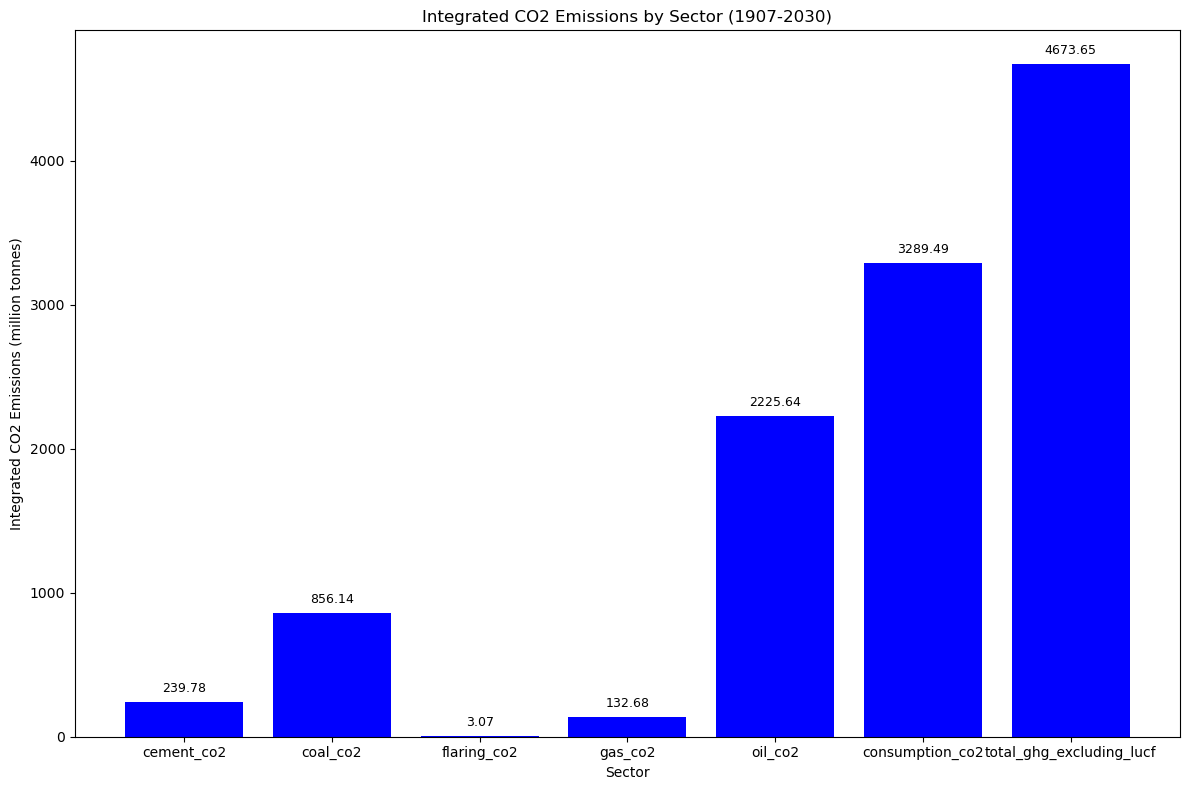

In [61]:
# Create a bar plot for integrated CO2 emissions
plt.figure(figsize=(12, 8))

# Extract sectors and their integrated emissions
sectors = list(integrated_emissions.keys())
emissions = list(integrated_emissions.values())

# Plotting
plt.bar(sectors, emissions, color='blue')

# Set plot title and labels
plt.title('Integrated CO2 Emissions by Sector (1907-2030)')
plt.xlabel('Sector')
plt.ylabel('Integrated CO2 Emissions (million tonnes)')

# Display the integrated emissions values on the bars
for i, emission in enumerate(emissions):
    plt.text(i, emission + 50, f"{emission:.2f}", ha='center', va='bottom', fontsize=9)

# Show plot
plt.tight_layout()
plt.show()
